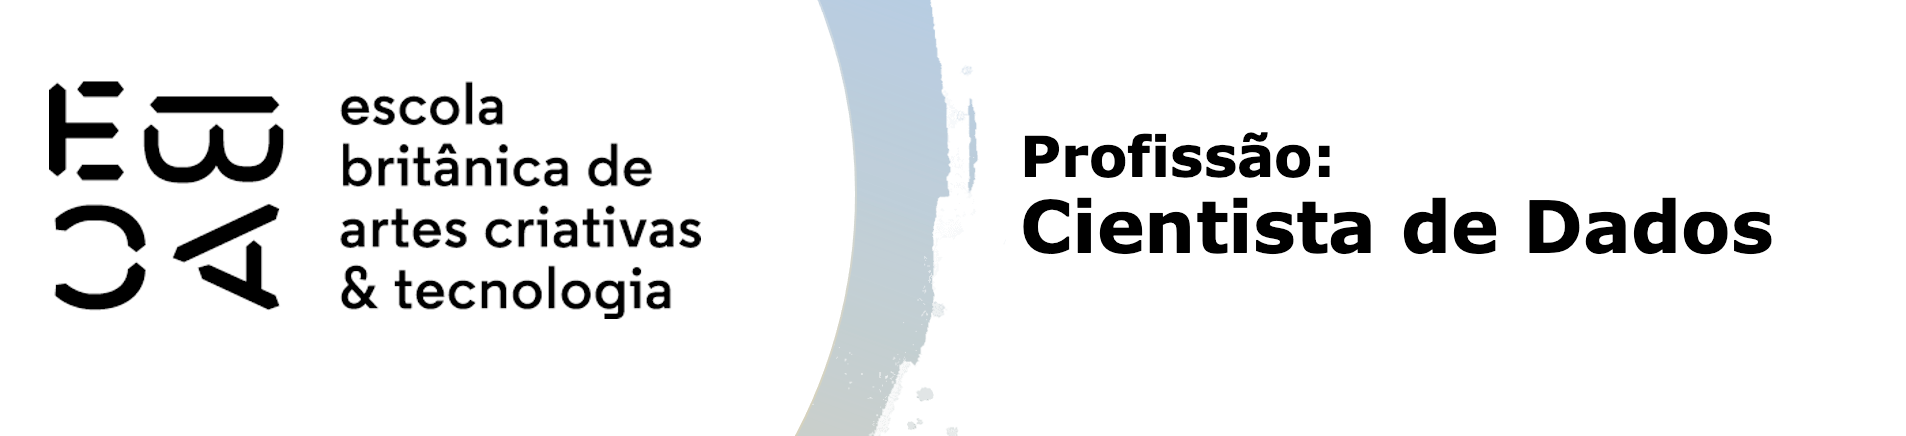

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('online_shoppers_intention.csv')

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [12]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [14]:
features = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay',
    'Weekend'
]

df_scope = df[features]


In [16]:
df_scope.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [18]:
df_scope.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Weekend                    0
dtype: int64

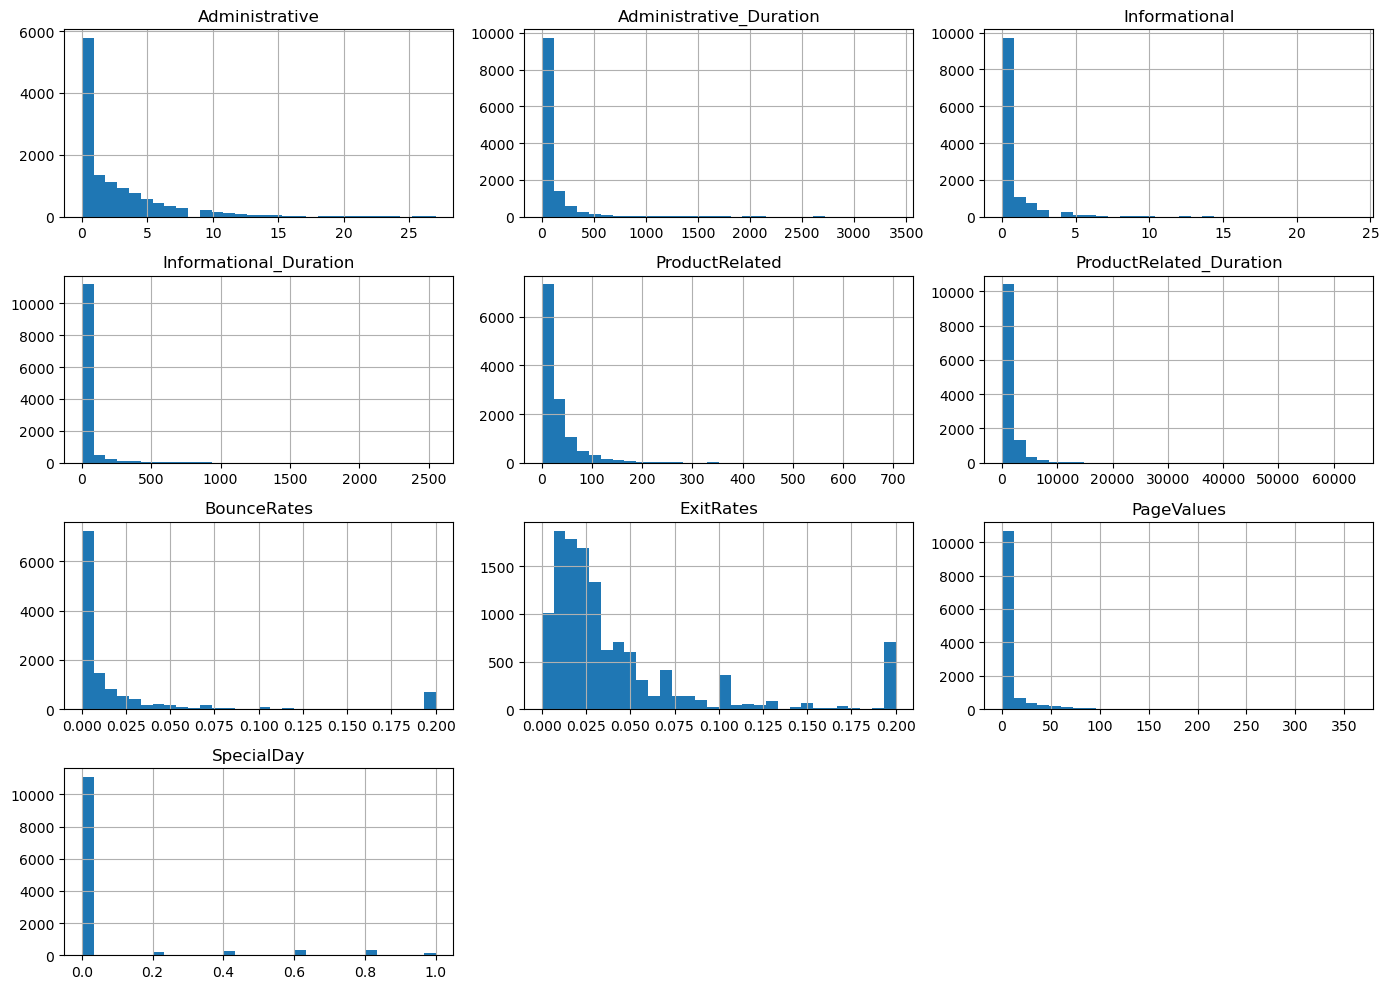

In [20]:
df_scope.hist(bins=30, figsize=(14,10))
plt.tight_layout()
plt.show()


In [22]:
df_scope['Weekend'] = df_scope['Weekend'].astype(int)

C:\Users\renna\AppData\Local\Temp\ipykernel_29800\2828906414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scope['Weekend'] = df_scope['Weekend'].astype(int)


In [24]:
skewed_features = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration',
    'PageValues'
]

df_scope[skewed_features] = np.log1p(df_scope[skewed_features])

C:\Users\renna\AppData\Local\Temp\ipykernel_29800\3959693760.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scope[skewed_features] = np.log1p(df_scope[skewed_features])


In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scope)

A análise das distribuições das variáveis do escopo evidencia forte assimetria à direita, com grande concentração de sessões de baixa interação e poucos casos de engajamento elevado. Variáveis relacionadas à duração e número de acessos apresentam outliers significativos, o que pode impactar o cálculo de distâncias em métodos de agrupamento. As variáveis BounceRates e ExitRates concentram-se em valores baixos, indicando padrões distintos de navegação. A variável SpecialDay apresenta predominância de valores zero, sugerindo baixa influência de datas promocionais na maioria das sessões. Diante disso, foram aplicadas transformações logarítmicas em variáveis altamente assimétricas e padronização dos dados, visando melhorar a qualidade do agrupamento.

----

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [31]:
cluster_features = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay',
    'Weekend',
    'Month',
    'VisitorType'
]


As variáveis selecionadas para o agrupamento foram escolhidas com o objetivo de representar o padrão de navegação do usuário durante a sessão e o contexto temporal em que ela ocorreu. Foram incluídas variáveis que indicam quantidade de acessos, tempo de permanência, qualidade da navegação e proximidade com datas especiais. Variáveis qualitativas foram devidamente tratadas por meio de codificação numérica, garantindo compatibilidade com métodos baseados em distância. Variáveis relacionadas a características técnicas do usuário, como sistema operacional e navegador, não foram consideradas por não contribuírem diretamente para o comportamento de navegação. A variável Revenue foi excluída do processo de agrupamento e será utilizada exclusivamente na etapa de avaliação dos clusters.

----

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [44]:
cluster_vars = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'SpecialDay',
    'Month',
    'Weekend'
]


In [46]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['Month'] = df['Month'].map(month_map)


In [48]:
df['Weekend'] = df['Weekend'].astype(int)


In [50]:
df_cluster = df[cluster_vars].copy()


In [52]:
df_cluster.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
Weekend                    0
dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()


In [58]:
X_scaled = scaler.fit_transform(df_cluster)

In [60]:
df_cluster

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,0


As variáveis utilizadas no agrupamento foram selecionadas com base no padrão de navegação do usuário e características temporais da sessão. Variáveis qualitativas foram devidamente transformadas em formato numérico e os dados foram padronizados para média zero e desvio padrão um, garantindo comparabilidade entre escalas distintas antes da aplicação do método de agrupamento hierárquico.

----

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [63]:
from sklearn.cluster import AgglomerativeClustering
#Agrupamento com 3 clusters
cluster_3 = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

df_cluster['cluster_3'] = cluster_3.fit_predict(X_scaled)


In [65]:
#Agrupamento com 4 clusters
cluster_4 = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)

df_cluster['cluster_4'] = cluster_4.fit_predict(X_scaled)


In [67]:
#Solução com 3 clusters
df_cluster.groupby('cluster_3').mean()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,cluster_4
cluster_3,,,,,,,,,,,,,
0,1.888812,52.197340,0.235248,9.426801,26.622178,975.729431,0.011273,0.034439,6.033900,0.064851,7.605347,0.248416,0.229307
1,0.021823,0.032092,0.008986,0.000000,1.967908,16.148524,0.192314,0.195461,0.000000,0.115019,6.867779,0.175866,1.000000
2,6.514128,323.415117,2.636802,227.314942,83.274983,3352.015120,0.006855,0.021358,8.044218,0.008822,8.397657,0.152998,2.000000


A solução com 3 grupos separa claramente sessões com navegação mínima,
sessões com interesse moderado e sessões com alta intenção de compra.
Entretanto, usuários com diferentes motivações acabam agrupados juntos.

----

In [69]:
#Solução com 4 clusters
df_cluster.groupby('cluster_4').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Weekend,cluster_3
cluster_4,,,,,,,,,,,,,
0,1.928709,53.114330,0.230274,9.029169,26.250429,967.334090,0.010810,0.033732,6.299115,0.009820,7.836728,0.253967,0.0
1,0.021823,0.032092,0.008986,0.000000,1.967908,16.148524,0.192314,0.195461,0.000000,0.115019,6.867779,0.175866,1.0
2,6.514128,323.415117,2.636802,227.314942,83.274983,3352.015120,0.006855,0.021358,8.044218,0.008822,8.397657,0.152998,2.0
3,1.406736,41.117437,0.295337,14.231346,31.113990,1077.169512,0.016871,0.042975,2.829327,0.729793,4.809585,0.181347,0.0


A solução com 4 grupos apresenta uma segmentação mais rica, separando
sessões motivadas por datas especiais de sessões com interesse contínuo
em produtos, além de isolar usuários de alta intenção de compra.

----

Com base nas análises descritivas, a solução com 4 clusters foi escolhida por
apresentar maior capacidade de discriminar padrões distintos de comportamento
de navegação e contexto temporal.

Essa segmentação permite ações estratégicas mais direcionadas, como campanhas
específicas para usuários sazonais e estratégias de conversão para usuários
com alta intenção de compra.

----

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [95]:
len(df_cluster), len(df)

(12330, 12330)

In [97]:
df_cluster['Revenue'] = df.loc[df_cluster.index, 'Revenue']


In [99]:
df.groupby('cluster_4')['Revenue'].mean()

cluster_4
0    0.157376
1    0.003851
2    0.259821
3    0.077720
Name: Revenue, dtype: float64

In [101]:
df_cluster.groupby('cluster_4')['Revenue'].mean()

cluster_4
0    0.157376
1    0.003851
2    0.259821
3    0.077720
Name: Revenue, dtype: float64

A avaliação dos agrupamentos utilizando a variável Revenue, que não participou do
processo de construção dos clusters, indica que o cluster 2 apresenta a maior
proporção média de sessões com geração de receita. Esse resultado, aliado às menores
taxas de rejeição e maior engajamento observados anteriormente, sugere que esse grupo
concentra os usuários com maior propensão à compra.

----